# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: September 29th(09/29/2020) submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)*

For the descriptive questions, you can write down the solution in paper and embed a picture of it to the notebook or type it out.

# Question 1 - Regularized regression (40 pts)
The data given is in "data.csv" - this is same fish dataset from the previous assignment, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python.

* Use the below code to load the dataset given in data.csv. Create a train_test split of 75:25 with random state = 50

* Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [112]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_csv("C:/Users/Acer/Desktop/Nisha/Nisha Career/PhD/Coursework/Fall 2020/Homework Assignments/HW2/data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)] # Excludes invalid values 1 row where weight = 0 was excluded

X = df.drop(['Weight'], axis=1)
y = df['Weight']

# Train test split 75-25 on dataset
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

#Scale so X's have zero mean and unit variance
from sklearn import preprocessing
Xtrn_scld=preprocessing.scale(X_train) # Data standardization
Xtst_scld=preprocessing.scale(X_test) # Data standardization
#Xtrn_norm1=preprocessing.normalize(X_train) # Data normalization
ytst_scld.shape
Xtrn_scld.mean(axis=0)
Xtrn_scld.std(axis=0)

array([1., 1., 1., 1., 1.])

#### a) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

In [113]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [114]:
### LASSO REGRESSION USING MSE METRIC with CV
alphas =  10**np.linspace(10,-2,100)*0.5 # Sweep of regularization parameter
#print('Largest alpha',alphas[0])
#print('Smallest alpha',alphas[99])

lasso = Lasso(random_state=50, max_iter=100000)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

GSCV_lasso = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True, scoring='neg_mean_squared_error')#Metric used MSE
GSCV_lasso.fit(Xtrn_scld,y_train)
GSCV_lasso.cv_results_
#scores = GSCV_lasso.cv_results_['mean_test_score']# root mean square error
#scores_std = GSCV_lasso.cv_results_['std_test_score']

GSCV_lasso.predict(Xtrn_scld)
metrics.r2_score(y_train,GSCV_lasso.predict(Xtrn_scld))

print('GSCV lasso best alpha',GSCV_lasso.best_params_)
print('GSCV lasso best lambda',alphas[GSCV_lasso.best_index_]/0.5) #Lambda is 0.5 * alpha by definition here
print('GSCV lasso mean CV MSE',-GSCV_lasso.best_score_)
#print('GSCV lasso best estimator',GSCV_lasso.best_estimator_)
print('GSCV lasso GSCV R^2',metrics.r2_score(y_train,GSCV_lasso.predict(Xtrn_scld)))
print('GSCV lasso best coef - parameter vector (w in the cost function formula)',GSCV_lasso.best_estimator_.coef_)
print('GSCV lasso best intercept - independent term in decision function.',GSCV_lasso.best_estimator_.intercept_)

# Using LassoCV object
k_fold = KFold(5)
lasso_cv = LassoCV(alphas=alphas, random_state=50, max_iter=10000,cv=k_fold)
lass=lasso_cv.fit(Xtrn_scld, y_train)

#print('Lasso best alpha - amount of penalization chosen by cross validation',lass.alpha_)
#print('Lasso best intercept - independent term in decision function.',lass.intercept_)
#print('Lasso best coef - parameter vector (w in the cost function formula)',lass.coef_)
#print('Lasso R^2 of the prediction', lass.score(Xtrn_scld,y_train))
#print('Lasso MSE mean',np.min(lass.mse_path_.mean(axis=1)))

GSCV lasso best alpha {'alpha': 0.7599555414764666}
GSCV lasso best lambda 1.5199110829529332
GSCV lasso mean CV MSE 17401.439880763086
GSCV lasso GSCV R^2 0.8718782099809097
GSCV lasso best coef - parameter vector (w in the cost function formula) [198.30206235   1.49024614  -0.          62.83819891  77.75425823]
GSCV lasso best intercept - independent term in decision function. 394.5686440677965


In [115]:
### RIDGE REGRESSION USING MSE METRIC with CV
alphas =  10**np.linspace(10,-2,100)*0.5 # Sweep of regularization parameter
#print('Largest alpha',alphas[0])
#print('Smallest alpha',alphas[99])

ridge = Ridge(random_state=50, max_iter=100000)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

GSCV_rdg = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=True, scoring='neg_mean_squared_error')#Metric used MSE
GSCV_rdg.fit(Xtrn_scld,y_train)
GSCV_rdg.cv_results_

GSCV_rdg.predict(Xtrn_scld)
metrics.r2_score(y_train,GSCV_rdg.predict(Xtrn_scld))

print('GSCV ridge best alpha',GSCV_rdg.best_params_)
print('GSCV ridge best lambda',alphas[GSCV_rdg.best_index_]/0.5)
print('GSCV ridge mean CV MSE',-GSCV_rdg.best_score_)
#print('GSCV ridge best estimator',GSCV_rdg.best_estimator_)
print('GSCV ridge GSCV R^2',metrics.r2_score(y_train,GSCV_rdg.predict(Xtrn_scld)))
print('GSCV ridge best coef - parameter vector (w in the cost function formula)',GSCV_rdg.best_estimator_.coef_)
print('GSCV ridge best intercept - independent term in decision function.',GSCV_rdg.best_estimator_.intercept_)

GSCV ridge best alpha {'alpha': 16.372745814388658}
GSCV ridge best lambda 32.745491628777316
GSCV ridge mean CV MSE 16902.858981284517
GSCV ridge GSCV R^2 0.8696060228753457
GSCV ridge best coef - parameter vector (w in the cost function formula) [70.1431239  69.70083119 60.62922448 51.76184337 74.83862821]
GSCV ridge best intercept - independent term in decision function. 394.5686440677965


#### b) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)


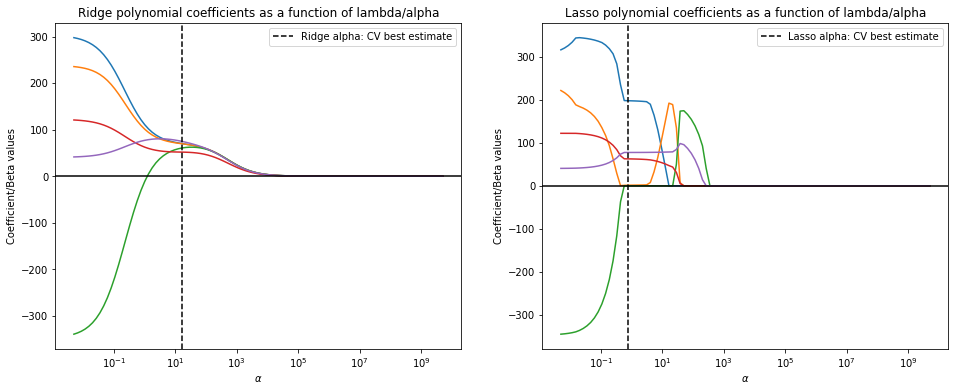

In [116]:
ridge_coef = []
lasso_coef = []
for lamb in alphas:
    ridge_coef.append(Ridge(alpha=lamb, random_state=50, max_iter=100000).fit(Xtrn_scld,y_train).coef_)
    lasso_coef.append(Lasso(alpha=lamb, random_state=50, max_iter=100000).fit(Xtrn_scld,y_train).coef_)
ridge_coef[0:2]
bst_rdglambda=GSCV_rdg.best_params_
bst_lasslambda=lasso_cv.alpha_
## Plots for ridge and lasso coefficients as function of lambda
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
left = 0
right = 1
axs[left].plot(alphas,ridge_coef)
axs[left].set_xscale("log")
axs[left].set_title("Ridge polynomial coefficients as a function of lambda/alpha")
axs[left].axhline(0,  color='k')
axs[left].axvline(alphas[GSCV_rdg.best_index_], linestyle='--', color='k',
            label='Ridge alpha: CV best estimate')
axs[left].legend(loc='best')

axs[right].plot(alphas,lasso_coef)
axs[right].set_xscale("log")
axs[right].set_title("Lasso polynomial coefficients as a function of lambda/alpha")
axs[right].axhline(0,  color='k')
axs[right].axvline(lasso_cv.alpha_, linestyle='--', color='k',
            label='Lasso alpha: CV best estimate')
axs[right].legend(loc='best')
for ax in axs.flat:
    ax.set(xlabel=r'$\alpha$', ylabel='Coefficient/Beta values')

from IPython.display import HTML as html_print

def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

left, word = 'Inference:' , 'The higher alpha is the weights become bigger, which makes sense because regularization is a method of weight decay. However, Lasso tends to push weights to zero more aggressively than Ridge. Ridge is smoother.' 
html_print(cstr(' '.join([left, cstr(word, color='green')]), color='black') )

#### c) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE), Mean Squared Error(MSE) and ${R^2}$ on the test data for each. (5pts)

In [117]:
from sklearn.linear_model import LinearRegression

# SLR - fit the model to training data
simp_reg = LinearRegression().fit(Xtrn_scld, y_train)

# SLR - save the beta coefficients
beta0_sreg = simp_reg.intercept_
beta1_sreg = simp_reg.coef_[0]
beta2_sreg = simp_reg.coef_[1]
beta3_sreg = simp_reg.coef_[2]
beta4_sreg = simp_reg.coef_[3]
beta5_sreg = simp_reg.coef_[4]

# make predictions on test data
ytstpredict_SLR = simp_reg.predict(Xtst_scld)

print('Errors and r^2 are reported on test data')
print("SLR (beta0, beta1, beta2, beta3, beta4, beta5) = ({0:8.6f}, {1:8.6f}, {2:8.6f}, {3:8.6f}, {4:8.6f}, {5:8.6f})".format(beta0_sreg, beta1_sreg, beta2_sreg, beta3_sreg, beta4_sreg, beta5_sreg))
print('SLR MAE:', metrics.mean_absolute_error(y_test, ytstpredict_SLR)) # MAE
print('SLR MSE:', metrics.mean_squared_error(y_test, ytstpredict_SLR)) # MSE
print('SLR r^2: ',metrics.r2_score(y_test, ytstpredict_SLR)) # R squared
print('\n')
# Ridge Reg - fit the model to training data
ridge_reg = Ridge(alpha = 16.372745814388658) # build the ridge regression model with specified lambda, i.e. alpha

ridge_reg.fit(Xtrn_scld, y_train) # fit the model to training data

# save the beta coefficients
beta0_ridge = ridge_reg.intercept_
beta1_ridge = ridge_reg.coef_[0]
beta2_ridge = ridge_reg.coef_[1]
beta3_ridge = ridge_reg.coef_[2]
beta4_ridge = ridge_reg.coef_[3]
beta5_ridge = ridge_reg.coef_[4]

# make predictions on test data
ytstpredict_ridge = ridge_reg.predict(Xtst_scld)

print("Ridge Reg - (beta0, beta1, beta2, beta3, beta4, beta5) = ({0:8.6f}, {1:8.6f}, {2:8.6f}, {3:8.6f}, {4:8.6f}, {5:8.6f})".format(beta0_ridge, beta1_ridge, beta2_ridge, beta3_ridge, beta4_ridge, beta5_ridge))
print('Ridge MAE:', metrics.mean_absolute_error(y_test, ytstpredict_ridge)) # MAE
print('Ridge MSE:', metrics.mean_squared_error(y_test, ytstpredict_ridge)) # MSE
print('Ridge r^2: ',metrics.r2_score(y_test, ytstpredict_ridge)) # R squared
print('\n')
# Lasso Reg - fit the model to training data
lasso_reg = Lasso(alpha = lasso_cv.alpha_) # build the lasso regression model with specified lambda, i.e. alpha

lasso_reg.fit(Xtrn_scld, y_train) # fit the model to training data

# save the beta coefficients
beta0_lasso = lasso_reg.intercept_
beta1_lasso = lasso_reg.coef_[0]
beta2_lasso = lasso_reg.coef_[1]
beta3_lasso = lasso_reg.coef_[2]
beta4_lasso = lasso_reg.coef_[3]
beta5_lasso = lasso_reg.coef_[4]

# make predictions on test data
ytstpredict_lasso = lasso_reg.predict(Xtst_scld)

print("Lasso Reg - (beta0, beta1, beta2, beta3, beta4, beta5) = ({0:8.6f}, {1:8.6f}, {2:8.6f}, {3:8.6f}, {4:8.6f}, {5:8.6f})".format(beta0_lasso, beta1_lasso, beta2_lasso, beta3_lasso, beta4_lasso, beta5_lasso))
print('Lasso MAE:', metrics.mean_absolute_error(y_test, ytstpredict_lasso)) # MAE
print('Lasso MSE:', metrics.mean_squared_error(y_test, ytstpredict_lasso)) # MSE
print('Lasso r^2: ',metrics.r2_score(y_test, ytstpredict_lasso)) # R squared


Errors and r^2 are reported on test data
SLR (beta0, beta1, beta2, beta3, beta4, beta5) = (394.568644, 303.354385, 238.404315, -348.192347, 122.405972, 40.409996)
SLR MAE: 103.37374547993404
SLR MSE: 19410.704667319827
SLR r^2:  0.8832278237525655


Ridge Reg - (beta0, beta1, beta2, beta3, beta4, beta5) = (394.568644, 70.143124, 69.700831, 60.629224, 51.761843, 74.838628)
Ridge MAE: 109.30297262633499
Ridge MSE: 21575.756430201745
Ridge r^2:  0.8702031649174995


Lasso Reg - (beta0, beta1, beta2, beta3, beta4, beta5) = (394.568644, 198.302062, 1.490246, -0.000000, 62.838199, 77.754258)
Lasso MAE: 105.38614723327737
Lasso MSE: 19837.99445712152
Lasso r^2:  0.8806573061181667


#### d) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

In [118]:
# Using LassoCV object
lasso_cv = LassoCV(alphas=None, max_iter=10000,cv=10)
lass=lasso_cv.fit(Xtrn_scld, y_train)

print('Lasso best alpha - amount of penalization chosen by cross validation',lass.alpha_)
print('Lasso best lambda - amount of penalization chosen by cross validation',lass.alpha_/0.5)
#print('Lasso best intercept - independent term in decision function.',lass.intercept_)
print('Lasso best coef - parameter vector',lass.coef_)
#print('Lasso R^2 of the prediction', lass.score(Xtrn_scld,y_train))
print('Lasso MSE path mean minimum',np.min(lass.mse_path_.mean(axis=1)))

lasso_reg = Lasso(alpha = lass.alpha_) # build the lasso regression model with specified lambda, i.e. alpha

lasso_reg.fit(Xtrn_scld, y_train) # fit the model to training data

ypredict_lasso = lasso_reg.predict(Xtrn_scld)
Lasso_ytst_pred = lasso_reg.predict(Xtst_scld)
# save the beta coefficients
beta0_lasso = lasso_reg.intercept_
beta1_lasso = lasso_reg.coef_[0]
beta2_lasso = lasso_reg.coef_[1]
beta3_lasso = lasso_reg.coef_[2]
beta4_lasso = lasso_reg.coef_[3]
beta5_lasso = lasso_reg.coef_[4]
lasso_reg.coef_

print('Lasso MSE:', metrics.mean_squared_error(y_train, ypredict_lasso)) # MSE

Lasso best alpha - amount of penalization chosen by cross validation 0.7609265050141201
Lasso best lambda - amount of penalization chosen by cross validation 1.5218530100282401
Lasso best coef - parameter vector [198.30101535   1.49049364  -0.          62.83734892  77.75461969]
Lasso MSE path mean minimum 17034.13814647236
Lasso MSE: 14571.499487728053


#### e) Why did we have to scale the data before regularization? (5pts)

We scale the data so the difference in scales between the features i.e., weight, length1, length2, length3, height, width donot affect our coefficients in the regression. E.g. weight is given in gms, while the other measurements are in cms so the range within weight is not the same as in other features. By scaling we adjust for difference in ranges between the features. This way we won't be penalizing a parameter because it has a high beta coefficient because of the units in which it is measured.

#### f) Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)? (5 pts)

Lasso seems to yield more sparse models for a reasonably set alpha based on this dataset. This is probably because lasso aggressively pulls down the coefficient weights towards zero. 

#### g) Run ElasticNet with the same values of alphas on the training data, and find the best value for alpha using MSE. Report the ${R^2}$ on test data and plot a graph showing the predictions and actual labels. Explain the results comparing the three regression models.(5 pts)

Best value of alpha was, [0.32896661]
Best value of lambda was [0.65793322]


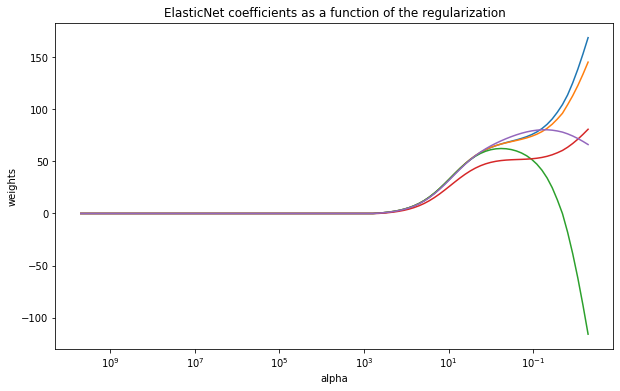

MAE ElasticNet:  109.96135681466039
MSE ElasticNet:  21886.967910604264
R2 ElasticNet: 0.8683309587064095
 


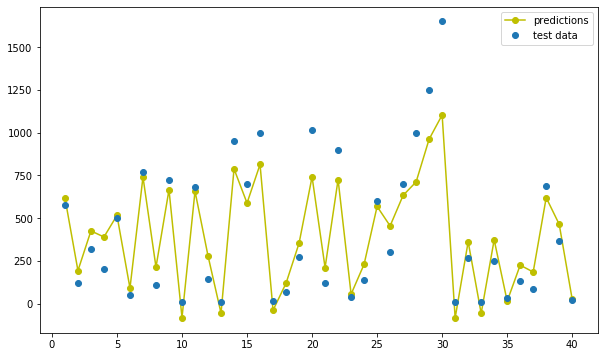

In [119]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(random_state=0, max_iter=10000)
alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(elasticnet, tuned_parameters,scoring='neg_mean_squared_error', cv=n_folds, refit=True)
clf.fit(Xtrn_scld, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
#plt.figure().set_size_inches(8, 6)
#plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

#plt.semilogx(alphas, scores + std_error, 'b--')
#plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
#plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

#plt.ylabel('CV score')
#plt.xlabel('alpha')
#plt.axhline(np.max(scores), linestyle='--', color='.5')
#plt.xlim([alphas[0], alphas[-1]])
#plt.title("ElasticNet")
best_alpha_elasticnet = clf.best_params_['alpha']
print("Best value of alpha was,",alphas[scores==np.max(scores)])
print("Best value of lambda was",2*alphas[scores==np.max(scores)])

#plt.show()
plt.figure(figsize=(10,6))
coefs = []
for a in alphas:
    elasticnet = ElasticNet(alpha=a, fit_intercept=True)
    elasticnet.fit(Xtrn_scld, y_train)
    coefs.append(elasticnet.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ElasticNet coefficients as a function of the regularization')
plt.axis('tight')
plt.show()



ridge = ElasticNet(alpha=best_alpha_elasticnet, fit_intercept=True,max_iter=10000)
ridge.fit(Xtrn_scld, y_train)
predictions = ridge.predict(Xtst_scld) #

print('MAE ElasticNet: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE ElasticNet: ', metrics.mean_squared_error(y_test, predictions))
print('R2 ElasticNet:', metrics.r2_score(y_test, predictions))
print(" ")

plt.figure(figsize=(10,6))
plt.plot(np.arange(1,41),predictions,'-yo',label='predictions')
plt.plot(np.arange(1,41),y_test,'o',label='test data',)
plt.legend()
plt.show()
##plot the range

# Practice Problem - Linear Regression: Least Squares and MLE (Not to be submitted)  
This question is a practise for you all to understand mathematically the assumptions of linear regression model. 

Consider linear regression with a single independent variable. Thus, predicted values are given by:  
$$y  = w_0  + w_1 x$$

Mathematically show that if the assumptions behind linear regression hold (slide 3 of the MLR slides), then the values of $w_0$ and $w_1$ obtained by minimizing MSE are indeed the  maximum likelihood solution of the corresponding underlying probability model relating the target variable to the input variable.

# Question 2 - Linear Regression: Regularizaton - Least Squares and MLE (5 pts)
Consider linear regression with an additional regularization term. The, predicted values are given by:  
$$\textrm{min}_{\beta} \Bigg\{\sum_{i}(y_{i}-\beta x_i{'})^2 \Bigg\} + \lambda \beta^2$$ 


where in this problem $y_i$, $x_i$, and $\beta$ are all scalars. Find a formula for $\beta$ that minimizes the equation above and prove that $\beta$ minimizes the equation above. $\lambda$ is a positive constant


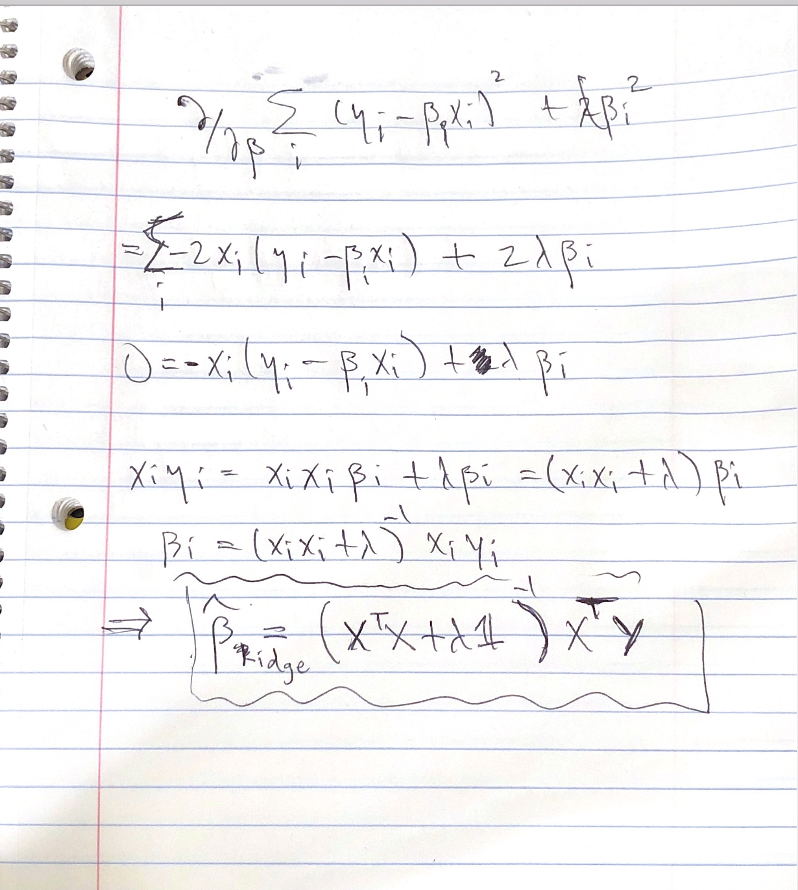

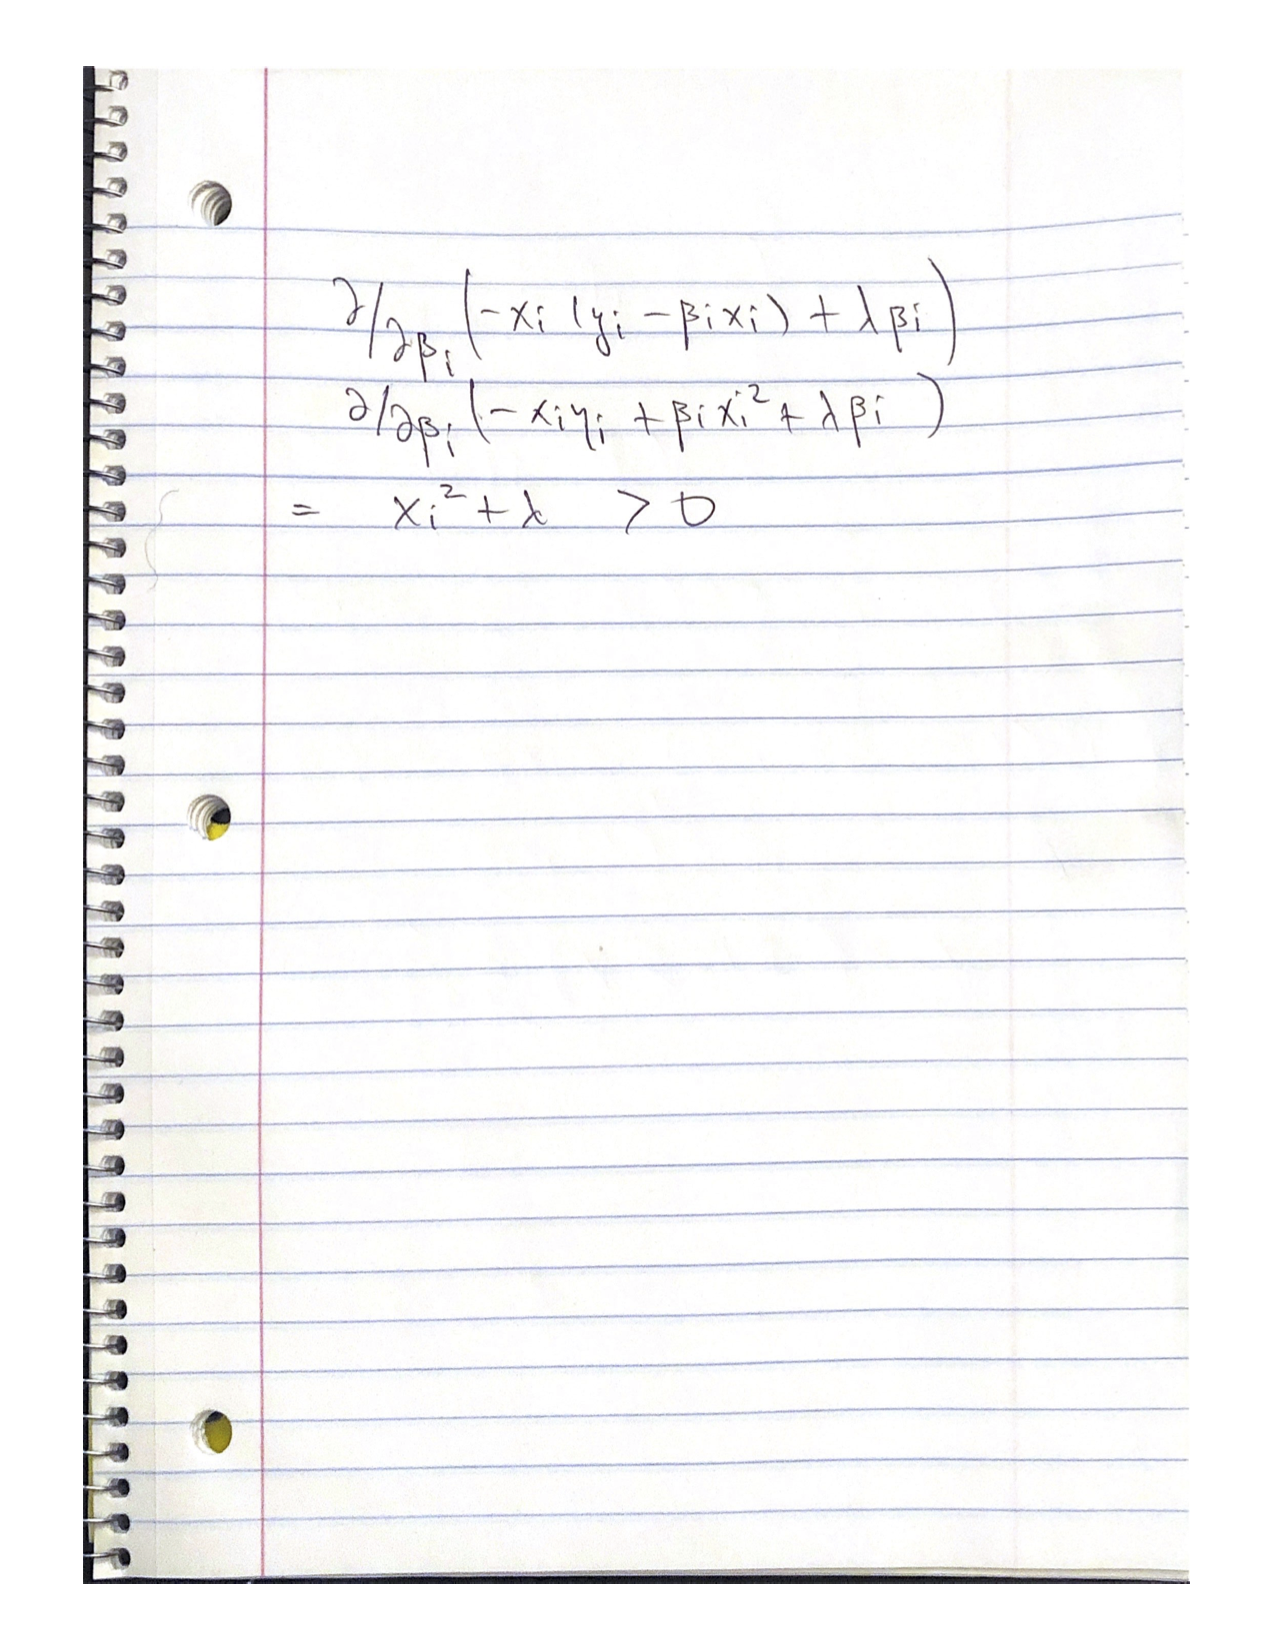

# Question 3 - Finding ${R^2}$ (10 pts)

Suppose we are given samples generated according to

$y_i$ = $8x_i$ + $w_i$
where $w_i$ and $x_i$ are $N(0,1)$. 

Assume we have infinite samples.

(a) What will be the linear regression predictor $\hat{\beta}$ ? (5 pts)

(b) What will be the ${R^2}$ of this $\hat{\beta}$  ? (5 pts)

In [120]:
from sklearn.linear_model import LinearRegression
x=np.random.randn(1000,1)
w=np.random.randn(1000,1)
y=(8*x)+w

xx=np.hstack((x,w))
df = pd.DataFrame(data=x,columns=['x'])
df['w']=w

reg=LinearRegression()
reg.fit(df,y)
reg.coef_
print('a) Linear regression predictor beta hat (point estimate):', reg.coef_)
print('b) R^2 of this beta hat (point estimate) :', metrics.r2_score(y,reg.predict(df)))

from IPython.display import HTML as html_print

def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

str = 'In this case we have a perfect fit. The outputs are being generated from the equation given, and the coefficients are 8,1. \n R2 is 1 because R2 = 1 - SSred /SStot and in this case SSred = 0.' 
html_print(cstr(str, color='green'))

a) Linear regression predictor beta hat (point estimate): [[8. 1.]]
b) R^2 of this beta hat (point estimate) : 1.0


# Question 4 - Collinearity in Multiple Linear Regression (5pts)
What do you understand by the collinearity problem that can be encountered in MLR? Suggest one way of alleviating this problem.

In [121]:
from IPython.display import HTML as html_print

def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

str='Collinearity here means that the one or more features in feature set/space used as predictors'\
+'are a linear combination of other features. This essentially causes the detrminant to be come non-invertible '\
+'causing trouble with finding a solution for the objective function. One way to reduce this problem is to perform'\
+'regularization as it adds a term to the objective function and thus helping the detrminant not being invertible.'
html_print(cstr(str,color='green'))

###### One issue with collinearity is that the uncertainty in beta becomes infinite. As suggested by the the below formula $s_{\beta_j}^2 = \frac{s^2}{(N-1) \text{(variation in Xj not associated to other Xs)}}$ . Therefore we can say that the uncertainty in beta becomes infinite as the variation in Xj can be completely explained by other Xs. One way of alleviating this would be through feature reduction, for example chosing new features after doing principal component analysis (PCA)

# Question 5 - Bias - Variance (5 pts)
Suppose you learn a ridge regression based on some of the independent variables available to you,
and including a few interaction terms as well. Your result is disappointing, and you believe that the model is
suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is
more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).


In [122]:
from IPython.display import HTML as html_print

def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

str='To test for high bias, I would try other model techniques and see if MSE can be brought down with an increasing '\
+'accuracy or R^2 metric. To test for high variance, I would perform an F-test on all features of the regression model'\
+'and also t-test to spot multicollinearity that might be affecting our metrics and model'\
+' I would also perform a plot based on model complexity in the horizontal axis and training and test error on the vertical axis.'\
+' If I begin to see that my testing error increases as my model complexity increases, then I will consider my model as'\
+' overfitting.'
html_print(cstr(str,color='green'))


# Question 6 (20 pts): 

We want to build a model that can predict y for unknown inputs x.(15 pts)

* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [123]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# code here

data_load = np.load('ps01.data',allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

#### (a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test) and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

X - TRN Feature size: 70
Y - TRN Feature size: 70
X - TST Feature size: 30
Y - TST Feature size: 30
Errors and r^2 are reported on test data
SLR MSE: 38.29023113306529


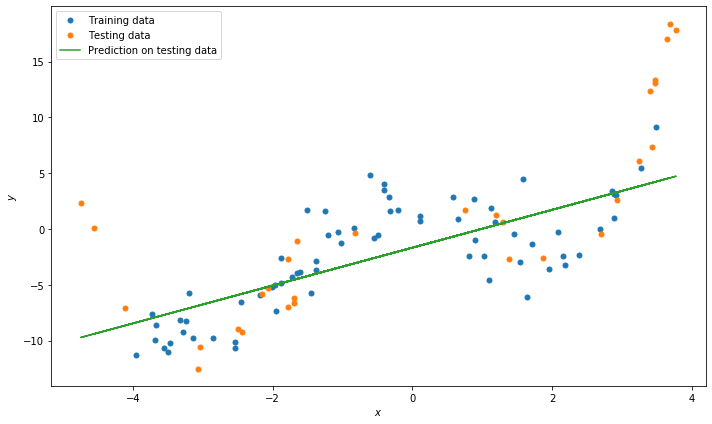

In [124]:
print('X - TRN Feature size:', x_train.size)
print('Y - TRN Feature size:',y_train.size)
print('X - TST Feature size:', x_test.size)
print('Y - TST Feature size:', y_test.size)
#for x in x_train:
  #print(x)
    
# SLR - fit the model to training data
reg = LinearRegression().fit(x_train, y_train)

# SLR - save the beta coefficients
beta0_sreg = reg.intercept_
beta1_sreg = reg.coef_[0]

# make predictions on test data
ypred_tst = reg.predict(x_test)
ypred_trn = reg.predict(x_train)
print('Errors and r^2 are reported on test data')
#print('SLR MAE:', metrics.mean_absolute_error(y_test, ypred_tst)) # MAE
print('SLR MSE:', metrics.mean_squared_error(y_test, ypred_tst)) # MSE
#print('SLR r^2: ',metrics.r2_score(y_test, ypred_tst)) # R squared

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x_train, y_train, '.', alpha=1, ms=10, label="Training data") # plot all trg data
ax.plot(x_test, y_test, '.',  alpha=1, ms=10, label="Testing data")
ax.plot(x_test, ypred_tst, '-',  alpha=1, ms=10, label="Prediction on testing data")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.legend(loc=0);

fig.tight_layout()

#### (b) (10 pts) Fit polynomial models of degrees 2, 3, 4, 6 and 8 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

In [125]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns

tra2 = PolynomialFeatures(2, include_bias=False)
tra3 = PolynomialFeatures(3, include_bias=False)
tra4 = PolynomialFeatures(4, include_bias=False)
tra6 = PolynomialFeatures(6, include_bias=False)
tra8 = PolynomialFeatures(8, include_bias=False)

In [126]:
new_ftr2 = tra2.fit_transform(x_train)
new_ftr3 = tra3.fit_transform(x_train)
new_ftr4 = tra4.fit_transform(x_train)
new_ftr6 = tra6.fit_transform(x_train)
new_ftr8 = tra8.fit_transform(x_train)

In [127]:
fitted_lr2 = LinearRegression().fit(new_ftr2, y_train)
fitted_lr3 = LinearRegression().fit(new_ftr3, y_train)
fitted_lr4 = LinearRegression().fit(new_ftr4, y_train)
fitted_lr6 = LinearRegression().fit(new_ftr6, y_train)
fitted_lr8 = LinearRegression().fit(new_ftr8, y_train)

In [128]:
def calc_err(cur_model, pol, order, data=None):
    # if needed, build the design matrix
    if data:
        data = y_test
    else:
        data = y_train
    TrnPred_lr=cur_model.predict(pol)
    met=metrics.mean_squared_error(data, TrnPred_lr) # MSE
    print('MSE for polynomial of order',order, ' is : ' , met)
    #TrnPred_lr
    return TrnPred_lr
    
print('------ MSE in training data fit for different polynomial models are shown below ------')
TrnFit_pol2=calc_err(fitted_lr2,tra2.fit_transform(x_train),2)
TrnFit_pol3=calc_err(fitted_lr3,tra3.fit_transform(x_train),3)
TrnFit_pol4=calc_err(fitted_lr4,tra4.fit_transform(x_train),4)
TrnFit_pol6=calc_err(fitted_lr6,tra6.fit_transform(x_train),6)
TrnFit_pol8=calc_err(fitted_lr8,tra8.fit_transform(x_train),8)

print('------ ************************************************************************ ------')
print('------ MSE in testing data fit for different polynomial models are shown below ------')
TstFit_pol2=calc_err(fitted_lr2,tra2.fit_transform(x_test),2,1)
TstFit_pol3=calc_err(fitted_lr3,tra3.fit_transform(x_test),3,1)
TstFit_pol4=calc_err(fitted_lr4,tra4.fit_transform(x_test),4,1)
TstFit_pol6=calc_err(fitted_lr6,tra6.fit_transform(x_test),6,1)
TstFit_pol8=calc_err(fitted_lr8,tra8.fit_transform(x_test),8,1)

------ MSE in training data fit for different polynomial models are shown below ------
MSE for polynomial of order 2  is :  8.373763650678681
MSE for polynomial of order 3  is :  7.464914213471163
MSE for polynomial of order 4  is :  3.9878737628026286
MSE for polynomial of order 6  is :  3.6015580230112354
MSE for polynomial of order 8  is :  3.55982852692439
------ ************************************************************************ ------
------ MSE in testing data fit for different polynomial models are shown below ------
MSE for polynomial of order 2  is :  66.93970899762829
MSE for polynomial of order 3  is :  62.605671427579075
MSE for polynomial of order 4  is :  4.565136137796654
MSE for polynomial of order 6  is :  42.810187106417104
MSE for polynomial of order 8  is :  145.89190193701887


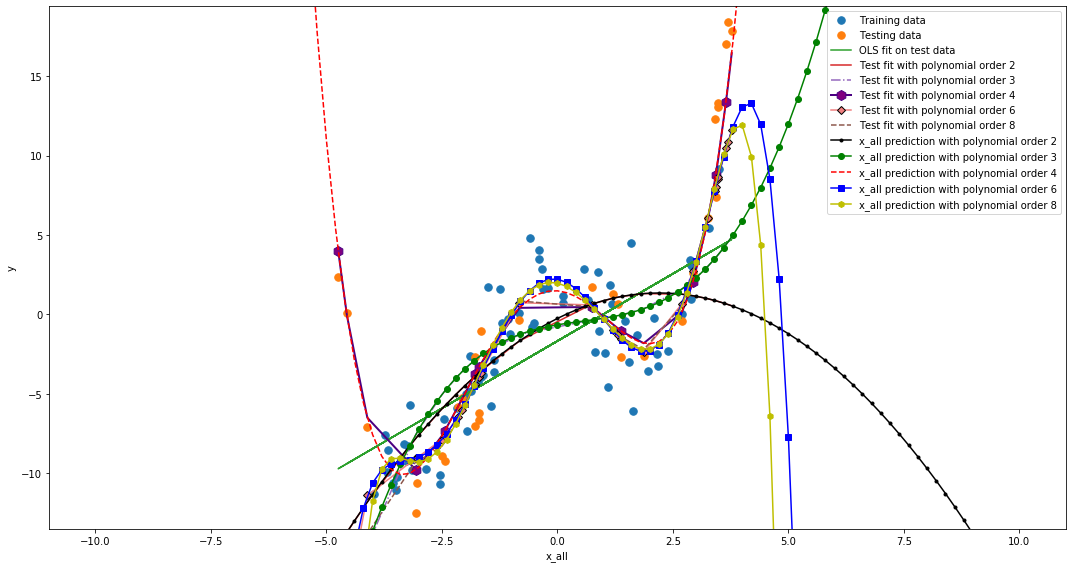

In [129]:
#Polynomial order 2 train and test data reorder for plots
type(x_test)
df = pd.DataFrame(data=x_test,columns=['x'])
df['y']=TstFit_pol2
df.head()
df_test2=df.sort_values(by=['x']).reset_index(drop=True)
type(x_train)
df = pd.DataFrame(data=x_train,columns=['x'])
df['y']=TrnFit_pol2
df.head()
df_trn2=df.sort_values(by=['x']).reset_index(drop=True)

#Polynomial order 3 train and test data reorder for plots
type(x_test)
df = pd.DataFrame(data=x_test,columns=['x'])
df['y']=TstFit_pol3
df.head()
df_test3=df.sort_values(by=['x']).reset_index(drop=True)
type(x_train)
df = pd.DataFrame(data=x_train,columns=['x'])
df['y']=TrnFit_pol3
df.head()
df_trn3=df.sort_values(by=['x']).reset_index(drop=True)

#Polynomial order 4 train and test data reorder for plots
type(x_test)
df = pd.DataFrame(data=x_test,columns=['x'])
df['y']=TstFit_pol4
df.head()
df_test4=df.sort_values(by=['x']).reset_index(drop=True)
type(x_train)
df = pd.DataFrame(data=x_train,columns=['x'])
df['y']=TrnFit_pol4
df.head()
df_trn4=df.sort_values(by=['x']).reset_index(drop=True)

#Polynomial order 6 train and test data reorder for plots
type(x_test)
df = pd.DataFrame(data=x_test,columns=['x'])
df['y']=TstFit_pol6
df.head()
df_test6=df.sort_values(by=['x']).reset_index(drop=True)
type(x_train)
df = pd.DataFrame(data=x_train,columns=['x'])
df['y']=TrnFit_pol6
df.head()
df_trn6=df.sort_values(by=['x']).reset_index(drop=True)

#Polynomial order 8 train and test data reorder for plots
type(x_test)
df = pd.DataFrame(data=x_test,columns=['x'])
df['y']=TstFit_pol8
df.head()
df_test8=df.sort_values(by=['x']).reset_index(drop=True)
type(x_train)
df = pd.DataFrame(data=x_train,columns=['x'])
df['y']=TrnFit_pol8
df.head()
df_trn8=df.sort_values(by=['x']).reset_index(drop=True)

# To find minimum and maximum limits for plots y axis from all test data fit 
ylim_min=[]
ylim_max=[]
def func_minmax(f, pol):
    if f=='amin':
        ymin=np.min(pol)
        ylim_min.append(ymin)
    else:
        ymax=np.max(pol)
        ylim_max.append(ymax)

ylim_pol2=np.min(TstFit_pol2)
ylim_pol3=np.min(TstFit_pol3)
ylim_pol4=np.min(TstFit_pol4)
ylim_pol7=np.min(TstFit_pol6)
ylim_pol8=np.min(TstFit_pol8)
ylim_min.append(ylim_pol2)

func_minmax('amin',TstFit_pol2)
func_minmax('amin',TstFit_pol3)
func_minmax('amin',TstFit_pol4)
func_minmax('amin',TstFit_pol6)
func_minmax('amin',TstFit_pol8)
ylim_minF=np.min(ylim_min)

func_minmax('amax',TstFit_pol2)
func_minmax('amax',TstFit_pol3)
func_minmax('amax',TstFit_pol4)
func_minmax('amax',TstFit_pol6)
func_minmax('amax',TstFit_pol8)
ylim_maxF=np.max(ylim_max)

fig, ax = plt.subplots(1,1, figsize=(15,8))

ax.plot(x_train, y_train, '.', alpha=1, ms=15, label="Training data") # plot all trg data
ax.plot(x_test, y_test, '.',  alpha=1, ms=15, label="Testing data")
ax.plot(x_test, ypred_tst, '-',  alpha=1, ms=10, label="OLS fit on test data")
#ax.plot(x_train, ypred_trn, '-',  alpha=1, ms=10, label="OLS fit on train data")
ax.plot(df_test2['x'], df_test2['y'], '-', alpha=1, ms=10, label="Test fit with polynomial order 2")
#ax.plot(df_trn2['x'], df_trn2['y'], '-', alpha=1, ms=10, label="Train fit with polynomial order 2") 
ax.plot(df_test3['x'], df_test3['y'], '-.', alpha=1, ms=10, label="Test fit with polynomial order 3") 
#ax.plot(df_trn3['x'], df_trn3['y'], '-.', alpha=1, ms=10, label="Train fit with polynomial order 3") 
ax.plot(df_test4['x'], df_test4['y'], color='#4b0082', linewidth=2,
         marker='h', markerfacecolor='purple', markeredgewidth=1,
         markevery=3, ms=10, label="Test fit with polynomial order 4") 
#ax.plot(df_trn4['x'], df_trn4['y'], color='#e30e0e', linewidth=2,
#         marker='h', markerfacecolor='red', markeredgewidth=1,
#          markevery=3, ms=10, label="Train fit with polynomial order 4") 
ax.plot(df_test6['x'], df_test6['y'], color='lightcoral', marker='D', markeredgecolor='black', 
        label="Test fit with polynomial order 6") 
#ax.plot(df_trn6['x'], df_trn6['y'], color='darkgreen', marker='D', markeredgecolor='black', 
#        label="Train fit with polynomial order 6") 
ax.plot(df_test8['x'], df_test8['y'], '--', alpha=1, ms=10, markeredgecolor='black', 
        label="Test fit with polynomial order 8") 
#ax.plot(df_trn8['x'], df_trn8['y'], '--', alpha=1, ms=10, label="Train fit with polynomial order 8") 
ax.plot(x_all,fitted_lr2.predict(tra2.fit_transform(x_all)), '.-', color='k', label="x_all prediction with polynomial order 2")
ax.plot(x_all,fitted_lr3.predict(tra3.fit_transform(x_all)), '-o', color='g', label="x_all prediction with polynomial order 3")
ax.plot(x_all,fitted_lr4.predict(tra4.fit_transform(x_all)), '--', color='r', label="x_all prediction with polynomial order 4")
ax.plot(x_all,fitted_lr6.predict(tra6.fit_transform(x_all)), '-s', color='b', label="x_all prediction with polynomial order 6")
ax.plot(x_all,fitted_lr8.predict(tra8.fit_transform(x_all)), '-h', color='y', label="x_all prediction with polynomial order 8")

#plt.ylim((ylim_minF,ylim_maxF))
ymax = np.max(np.vstack((y_test,y_train))) + 1
#print(ymax)
ymin = np.min(np.vstack((y_test,y_train))) - 1
#print(ymin)
plt.ylim(ymin,ymax)
ax.set_xlabel('x_all')
ax.set_ylabel('y')

ax.legend(loc='best');

fig.tight_layout()

#### (c) (5 pts) Which model performed the best? Explain using the bias-variance tradeoff.


The model that did the best is the 4th order polynomial. It has the lowest MSE on the test set. Moreover, we can see that the plot of the predictions follows the data pretty well. It is interesting in light of the bias-variance tradeoff because as we can see the 4th order polynomial has a higher MSE on the training set than the 8th order polynomial, however the test set MSE of the 8th order polynomial is very much higher, suggesting that the increased model complexity has higher variance error.

------ MSE in training data fit for 4th order polynomial model ------
MSE for polynomial of order 4  is :  3.9878737628026286
------ MSE in testing data fit for 4th order polynomial model ------
MSE for polynomial of order 4  is :  4.565136137796654


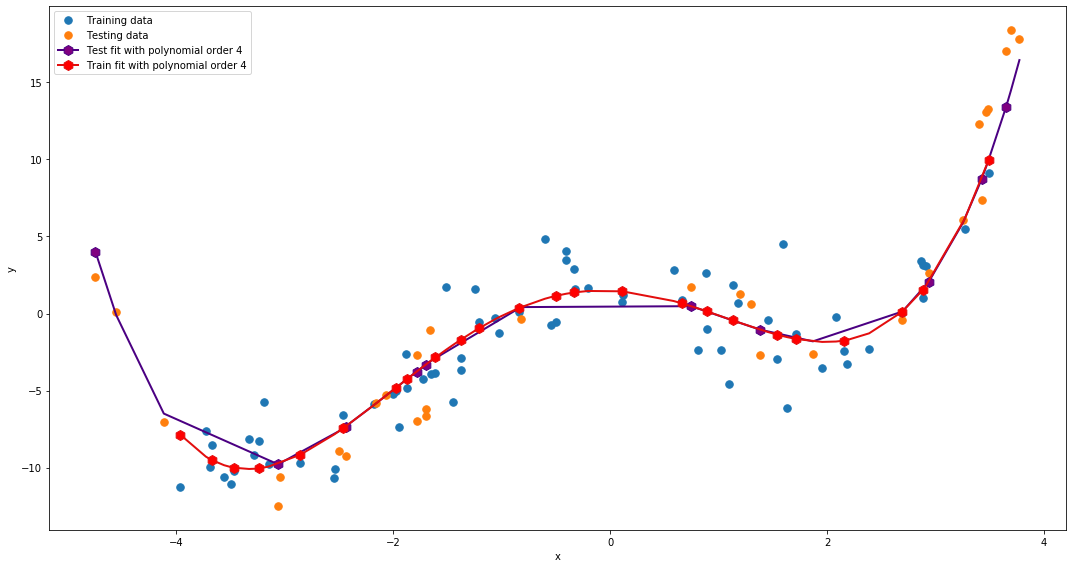

In [130]:
print('------ MSE in training data fit for 4th order polynomial model ------')
calc_err(fitted_lr4,tra4.fit_transform(x_train),4)
print('------ MSE in testing data fit for 4th order polynomial model ------')
calc_err(fitted_lr4,tra4.fit_transform(x_test),4,1)

fig, ax = plt.subplots(1,1, figsize=(15,8))

ax.plot(x_train, y_train, '.', alpha=1, ms=15, label="Training data") # plot all trg data
ax.plot(x_test, y_test, '.',  alpha=1, ms=15, label="Testing data")
ax.plot(df_test4['x'], df_test4['y'], color='#4b0082', linewidth=2,
         marker='h', markerfacecolor='purple', markeredgewidth=1,
         markevery=3, ms=10, label="Test fit with polynomial order 4") 
ax.plot(df_trn4['x'], df_trn4['y'], color='#e30e0e', linewidth=2,
         marker='h', markerfacecolor='red', markeredgewidth=1,
          markevery=3, ms=10, label="Train fit with polynomial order 4") 

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend(loc='best');

fig.tight_layout()